In [5]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix


In [6]:

dataset_path = "data_17Flowers/train"


idg=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.8,1.2),
    zoom_range=0.1,
    shear_range=0.3,
    rotation_range=10,
    validation_split=0.2

)

train_data=idg.flow_from_directory(
    dataset_path,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32,
    subset='training',

)
val_data=idg.flow_from_directory(
    dataset_path,
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32,
    subset='validation',

)

Found 823 images belonging to 17 classes.
Found 197 images belonging to 17 classes.


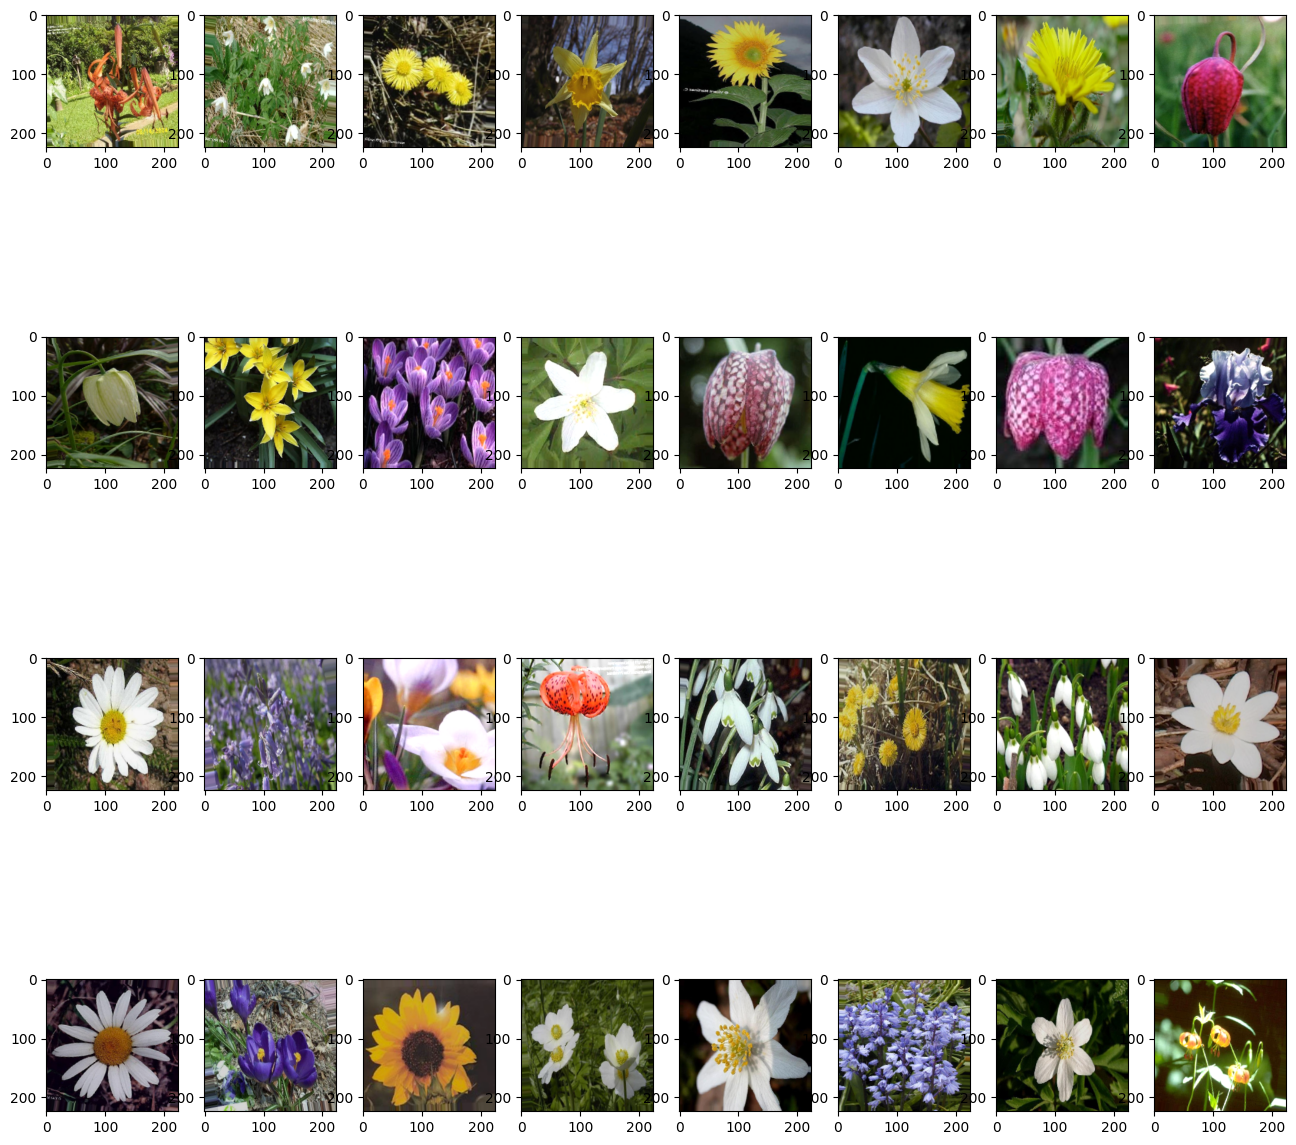

In [7]:

some_images=next(train_data)
X=some_images[0]
Y=some_images[1]

plt.figure(figsize=(16,16))
for i in range(32):
  plt.subplot(4,8,i+1)
  plt.imshow(X[i])


In [8]:
model = tf.keras.models.Sequential([
  layers.Conv2D(16,(3,3),activation='relu',strides=(2, 2),input_shape=(224,224,3)),
  layers.Conv2D(54,(3,3),activation='relu',strides=(2, 2)),
  layers.MaxPool2D(),
  layers.Conv2D(64,(5,5),activation='relu',strides=(2, 2)),
  layers.Conv2D(128,(3,3),activation='relu',strides=(2, 2)),
  layers.MaxPool2D(),
  layers.Flatten(),
  layers.Dense(512,activation='relu'),
  layers.Dense(17,activation='softmax')
])

In [9]:

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=["accuracy"]
)



In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 111, 111, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 55, 55, 54)        7830      
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 54)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        86464     
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 128)         0         
 g2D)                                                   

In [16]:
plt_model = model.fit(train_data, validation_data=val_data, epochs=20)

Epoch 1/20
26/26 [==============================] - 18s 710ms/step - loss: 0.4918 - accuracy: 0.8323 - val_loss: 1.2748 - val_accuracy: 0.6193
Epoch 2/20
26/26 [==============================] - 16s 635ms/step - loss: 0.4185 - accuracy: 0.8530 - val_loss: 1.4877 - val_accuracy: 0.5990
Epoch 3/20
26/26 [==============================] - 16s 604ms/step - loss: 0.3671 - accuracy: 0.8761 - val_loss: 1.5886 - val_accuracy: 0.5838
Epoch 4/20
26/26 [==============================] - 16s 610ms/step - loss: 0.3610 - accuracy: 0.8748 - val_loss: 1.4541 - val_accuracy: 0.6497
Epoch 5/20
26/26 [==============================] - 16s 600ms/step - loss: 0.3505 - accuracy: 0.8821 - val_loss: 1.0942 - val_accuracy: 0.6751
Epoch 6/20
26/26 [==============================] - 16s 605ms/step - loss: 0.2734 - accuracy: 0.8919 - val_loss: 1.3966 - val_accuracy: 0.6497
Epoch 7/20
26/26 [==============================] - 16s 620ms/step - loss: 0.3201 - accuracy: 0.8931 - val_loss: 1.3069 - val_accuracy: 0.6497

In [17]:

test_dataset_path = 'data_17Flowers/test'
width=height = 224
batch_size = 32
idg = ImageDataGenerator(
    rescale = 1./255,
)


test_data = idg.flow_from_directory(
    test_dataset_path,
    target_size = (width,height),
    class_mode = "categorical",
    batch_size = batch_size,
)

Found 340 images belonging to 17 classes.


In [18]:
model.evaluate(test_data)

11/11 [==============================] - 1s 100ms/step - loss: 1.7977 - accuracy: 0.6265


[1.7976510524749756, 0.6264705657958984]

In [19]:
model.save("weights/17_Flowers.h5")


11/11 [==============================] - 2s 171ms/step


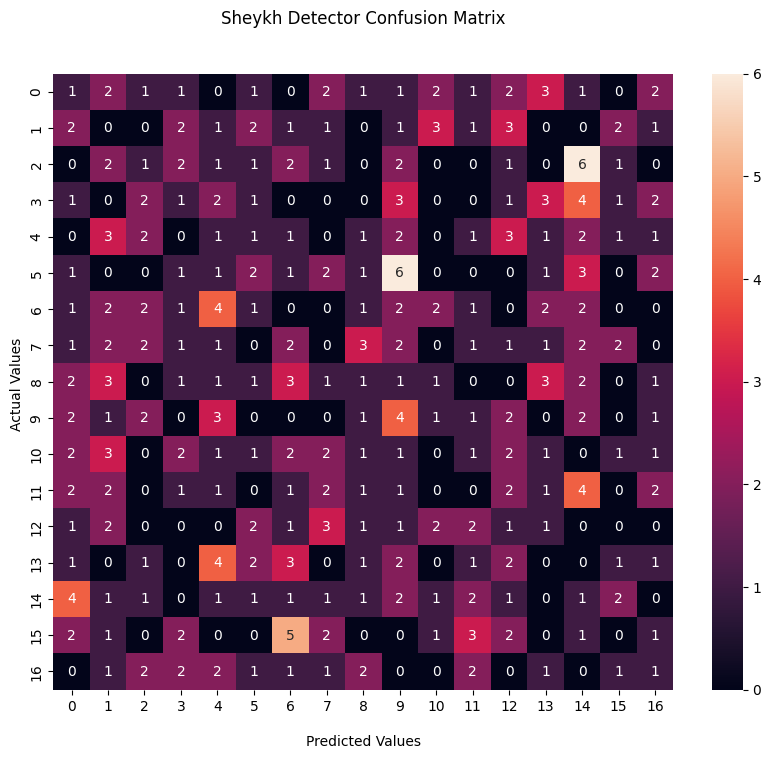

In [23]:
import seaborn as sns

Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)
conf_mat = confusion_matrix(test_data.classes, y_pred)

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(conf_mat, annot=True)
ax.set_title('Sheykh Detector Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

plt.show()